# Exploratory Data Analysis

In [3]:
import pandas as pd
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)


/Users/mac/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [4]:
students=pd.read_csv("student-mat.csv", sep=',')
students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
#female are 1 , males are 0
students.sex=(students.sex=='F')*1
students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,1,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,1,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,1,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,1,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,1,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


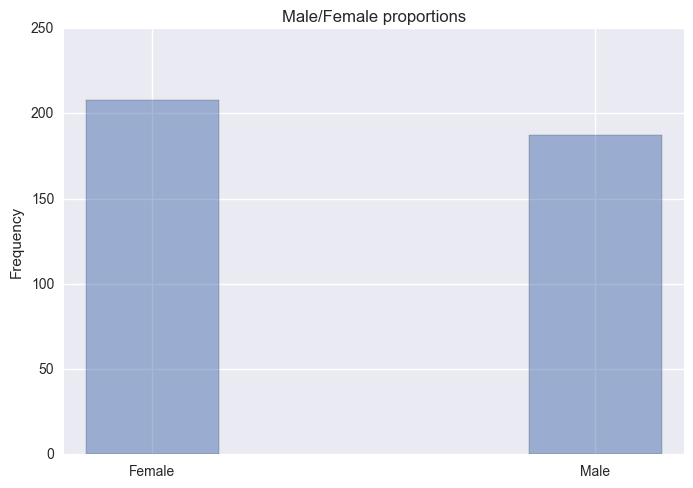

In [6]:
objects = ('Female','Male')
y_pos = np.arange(len(objects))
performance = []
performance.append(students.sex.sum())
performance.append(len(students)-students.sex.sum())
plt.bar(y_pos, performance, align='center', alpha=0.5,width=0.3)
plt.xticks(y_pos, objects)
plt.ylabel('Frequency')
plt.title('Male/Female proportions')
 
plt.show()

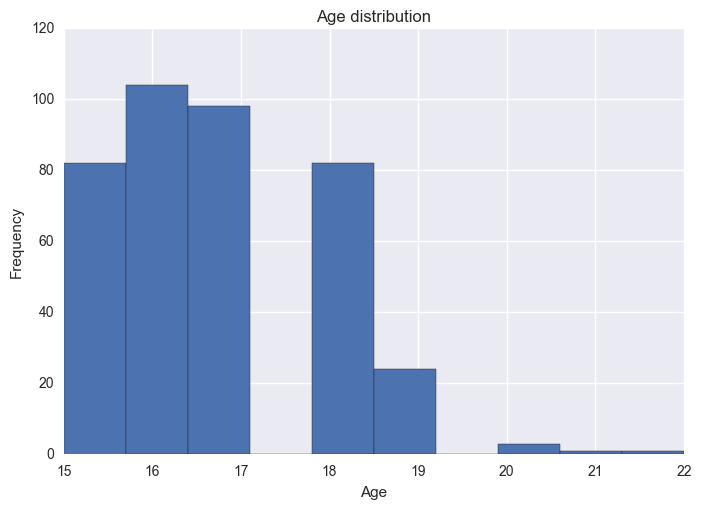

In [7]:
#age distribution 
plt.hist(students.age)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age distribution')

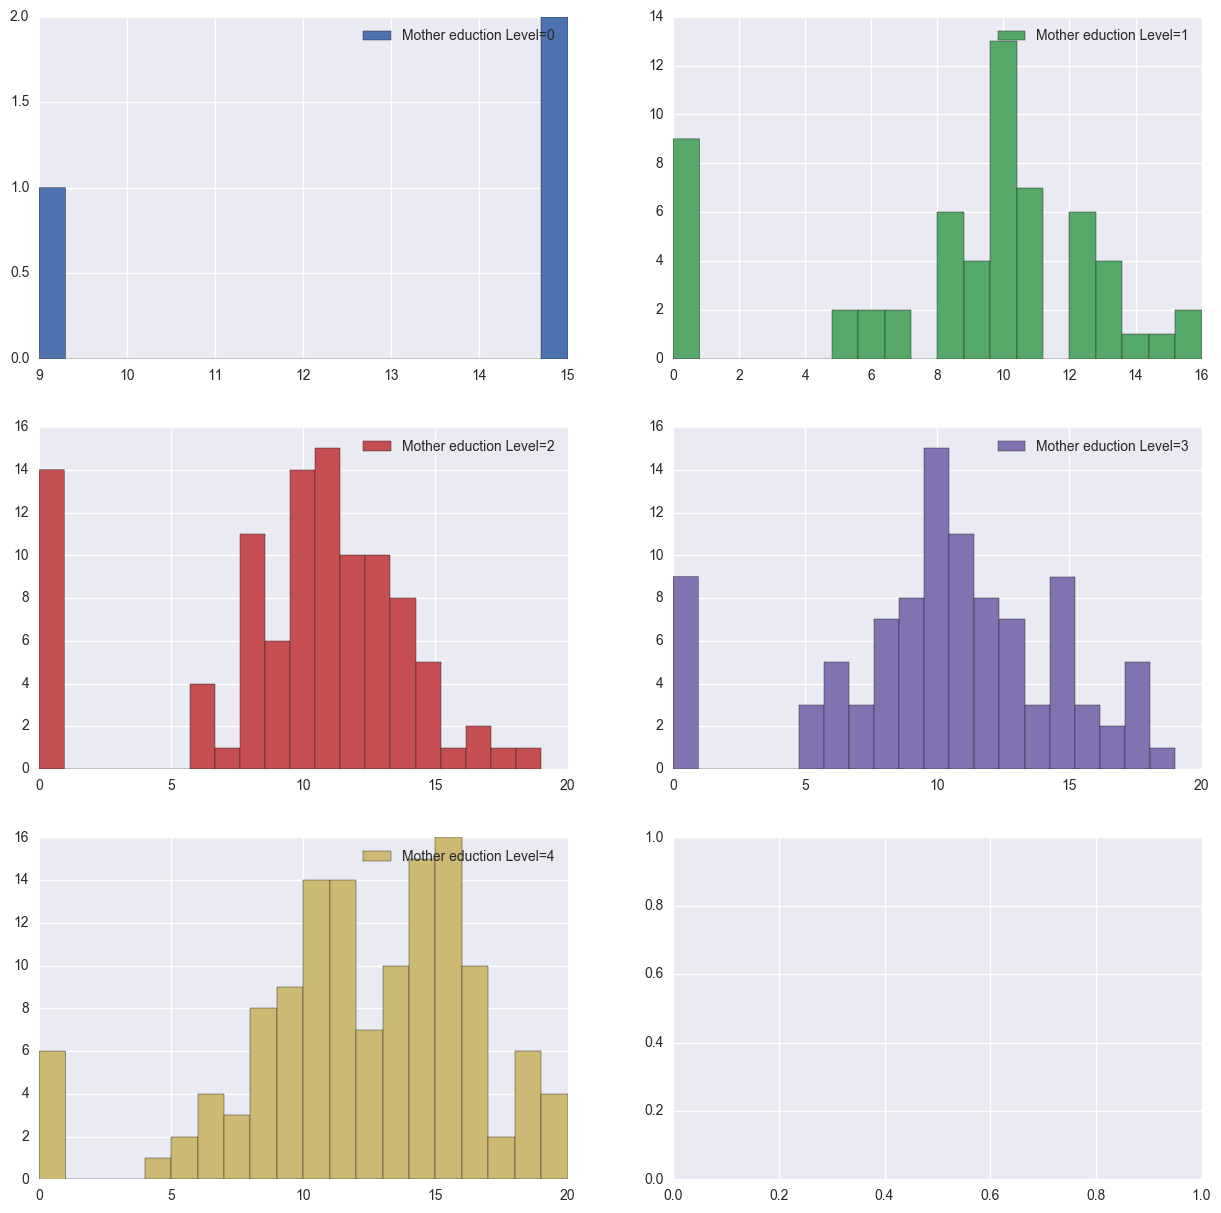

In [8]:
f,a = plt.subplots(3,2,figsize=(15,15))
a = a.ravel()
colors=sns.color_palette()
for i,a in enumerate(a):
    if(i!=5):
        a.hist(students.G3[students.Medu==i],color=colors[i],label='Mother eduction Level='+str(i),bins=20)
        a.legend()
        
        

In [9]:
def sexRelationship(status):
    f,a = plt.subplots(1,2,figsize=(7,3),sharex=True, sharey=True)
    a = a.ravel()
    f.text(0.5, 0.01, 'Grades', ha='center')
    f.text(0.04, 0.5, 'Frequency', va='center', rotation='vertical')
    colors=sns.color_palette()
    for i,a in enumerate(a):
        if(i!=5):

            a.hist(students.G3[(students.sex==i) & (students.romantic==status)],color=colors[i]
                   ,label='Sex='+str(i)+'  '+'relationship'+'  '+status,bins=20,normed=True)
            a.legend()
            print 'mean: '+str(np.mean(students.G3[(students.sex==i) & (students.romantic==status)]))
            print 'std: '+str(np.std(students.G3[(students.sex==i) & (students.romantic==status)]))
                                                     


        
        

mean: 10.4150943396
std: 4.31510712722
mean: 9.01265822785
std: 5.08284200101
mean: 11.1119402985
std: 4.53289872621
mean: 10.5503875969
std: 4.19109658054


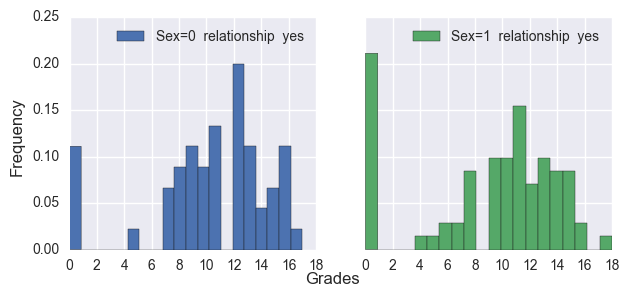

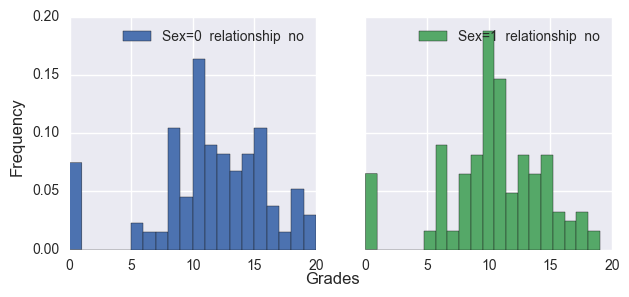

In [10]:
sexRelationship('yes')
sexRelationship('no')

In [11]:
studytime=[1.0,2.0,3.0,4.0]
mixedlist=[students.G3[students.studytime==k] for k in studytime]
for i in range(len(mixedlist)):
    print len(mixedlist[i])


105
198
65
27


As we can see Mothers level of eduction influence the grades. 

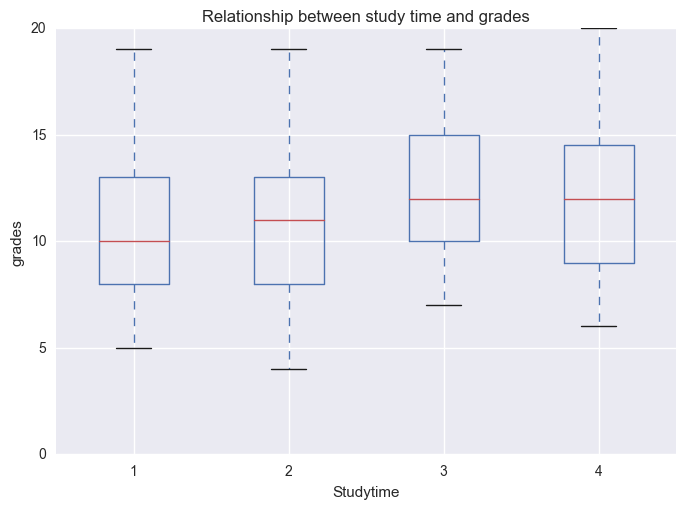

In [12]:
plt.title('Relationship between study time and grades')
plt.boxplot(mixedlist)
plt.xlabel('Studytime')
plt.ylabel('grades')

A study hour of 3 hours seem fruitifull than a studytime of 4 hours !

In [13]:
dfc=students.corr()
dfc

,sex,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
sex,1.000000,0.028606,-0.078228,-0.034878,-0.059722,0.306268,-0.044436,-0.058971,-0.238744,-0.075897,-0.268171,-0.274194,-0.143588,0.066962,-0.091839,-0.091099,-0.103456
age,0.028606,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.078228,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.034878,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,-0.059722,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,0.306268,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,-0.044436,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,-0.058971,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,-0.238744,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,-0.075897,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791


From this corr graph we could notice the factors that influence tremendously the grades for instance:
#Age=0.16
Fedu=0.21 modal
medu=0.15 modal 
traveltime=0.11
failures=0.36
goout=0.13
We choose Age, 

# Building a simple predictive model

### EDA Iris

### Iris-virginica prediction: *SepalLengthCm-->PetalLengthCm*

In [19]:
Iris=pd.read_csv('Iris.csv',sep=',')
print Iris.shape
Iris.head()


(150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
# lets visualise the distribution of Iris 
def distplot(param):
    plt.hist(Iris[param],normed=True)
    plt.xlabel(param)
    plt.ylabel('Frequency')
    

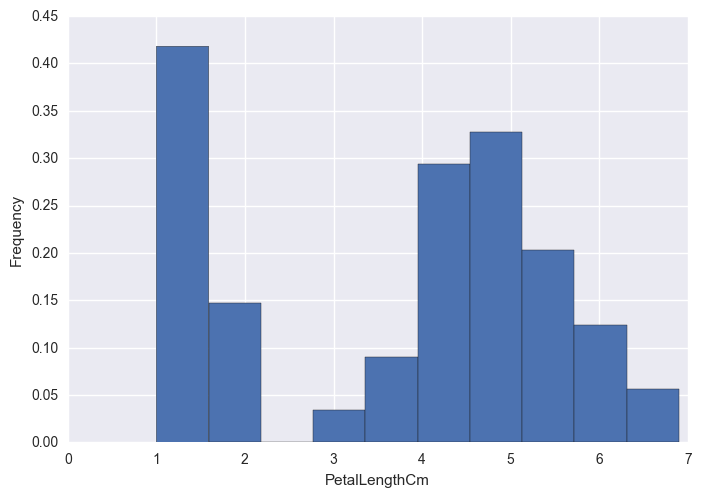

In [21]:
distplot('PetalLengthCm')


In [22]:
Iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [23]:
Iris.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [24]:
#our f and x for the function x--->f(x)Iris-setosa,Iris-virginica
sIris=Iris.sort_index(by=['SepalLengthCm','PetalLengthCm'], ascending=[True,True])
x=sIris.SepalLengthCm
f=sIris.PetalLengthCm


/Users/mac/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  from ipykernel import kernelapp as app


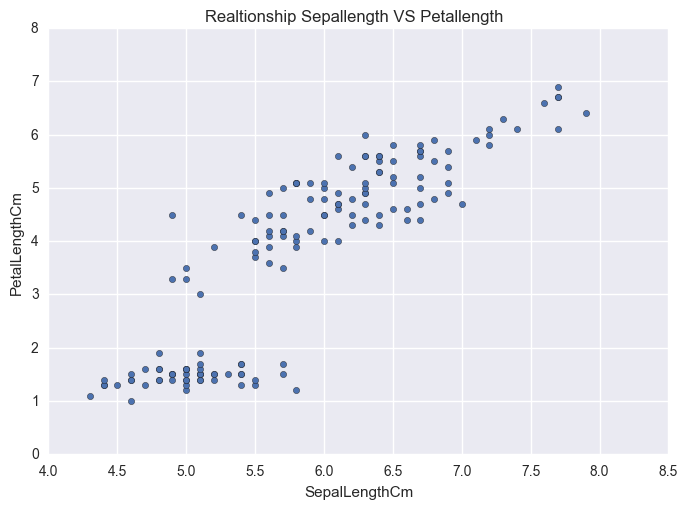

In [25]:
#lets try to predict petal lenght from sepal lenght
plt.title('Realtionship Sepallength VS Petallength  ')
plt.xlabel('SepalLengthCm')
plt.ylabel('PetalLengthCm')
plt.scatter(x,f)

In [26]:
indexes=np.sort(np.random.choice(Iris.shape[0],size=30,replace=False))
indexes

array([  3,   4,   7,  13,  17,  20,  23,  26,  43,  48,  58,  59,  63,
        67,  77,  84,  86,  95,  98, 104, 105, 117, 126, 127, 132, 137,
       142, 145, 146, 147])

In [27]:
# lets take a sample 
samplex=x[indexes]
samplef=f[indexes]


In [28]:
#function for ploting x and f
def make_plot():
    fig, axes=plt.subplots(figsize=(20,8), nrows=1, ncols=2);
    axes[0].set_ylabel("$PetalLengthCm$")
    axes[0].set_xlabel("$SepalLengthCm$")
    axes[1].set_xlabel("$SepalLengthCm$")
    axes[1].set_yticklabels([])
    axes[0].set_ylim([0,8])
    axes[1].set_ylim([0,8])
    axes[0].set_xlim([0,8])
    axes[1].set_xlim([0,8])
    plt.tight_layout();
    return axes

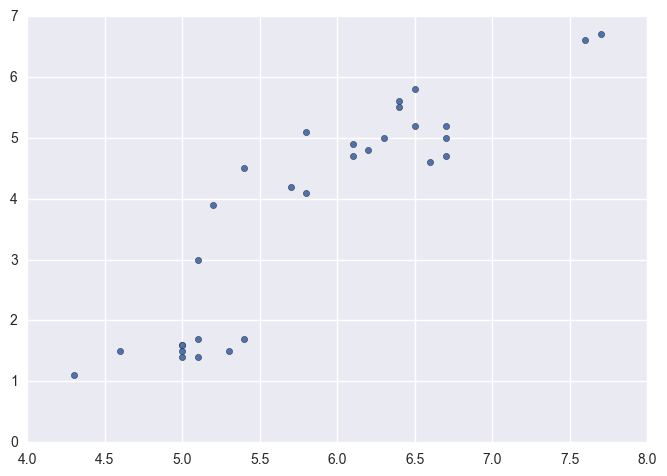

In [29]:
plt.scatter(samplex,samplef)


In [30]:
# lets fit this data to a simpe model
g1=np.poly1d(np.polyfit(samplex,samplef,1))
print np.polyfit(samplex,samplef,1)
print g1

[ 1.91343829 -7.37752438]
 
1.913 x - 7.378


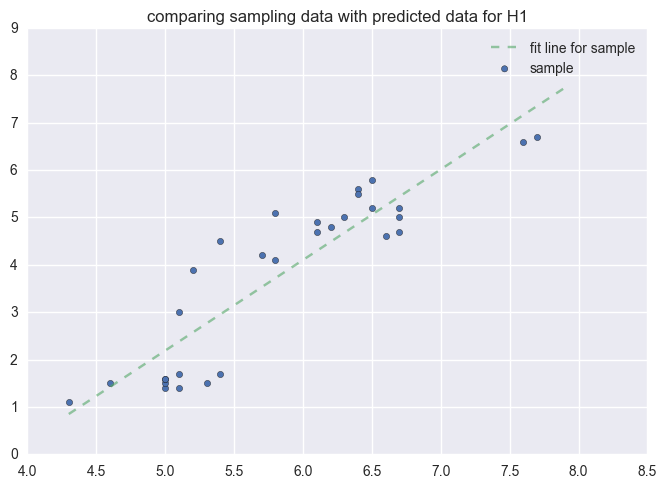

In [31]:
plt.scatter(samplex,samplef,label='sample')
plt.plot(x,g1(x),'--',alpha=0.6,color=colors[1],label='fit line for sample')
plt.title('comparing sampling data with predicted data for H1')
plt.legend()



In [32]:
#lets increase the complexity of the model using g20
g20=np.poly1d(np.polyfit(samplex,samplef,20))


/Users/mac/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


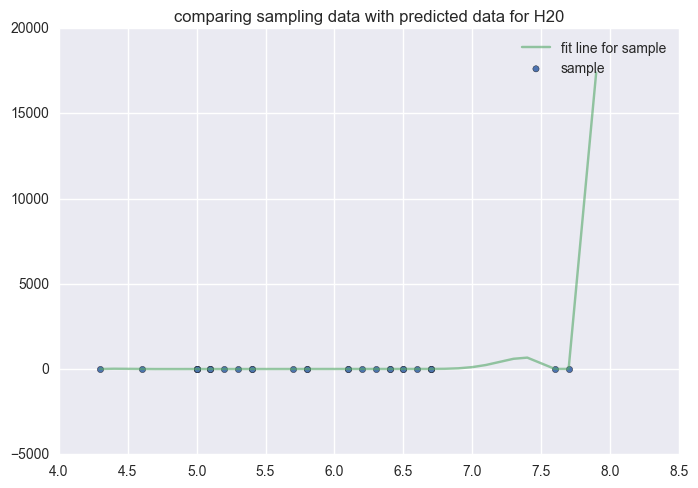

In [33]:
#lets draw again 
plt.scatter(samplex,samplef,label='sample')
plt.plot(x,g20(x),'-',alpha=0.6,color=colors[1],label='fit line for sample')
plt.title('comparing sampling data with predicted data for H20')
plt.legend()

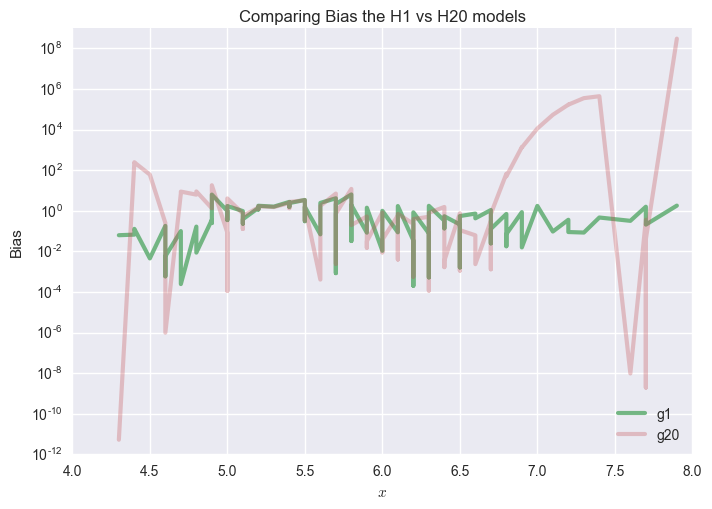

In [35]:
# lets find out the deterministic error or bias that comes from the model complexity
plt.title('Comparing Bias the H1 vs H20 models')
plt.plot(x,(f-g1(x))**2,lw=3,label='g1',color=colors[1],alpha=0.8)
plt.plot(x,(f-g20(x))**2,lw=3,label='g20',color=colors[2],alpha=0.3)
plt.yscale('log')
plt.xlabel('$x$')
plt.ylabel('Bias')
plt.legend(loc=4)



 #### g(x)=argminh(x)∈R(h(x)) on D, finding g is called 'Empirical Risk Minimization' process 
#### The purpose is to find the best model complexity from the model space (here is polynomial) that minimize the bias 
 #### in other words we fit all the models(g1,g2,....g20) to the sample dataset D and we choose the g that minimize 
 #### T(f-g(x))**2 for the whole population


 


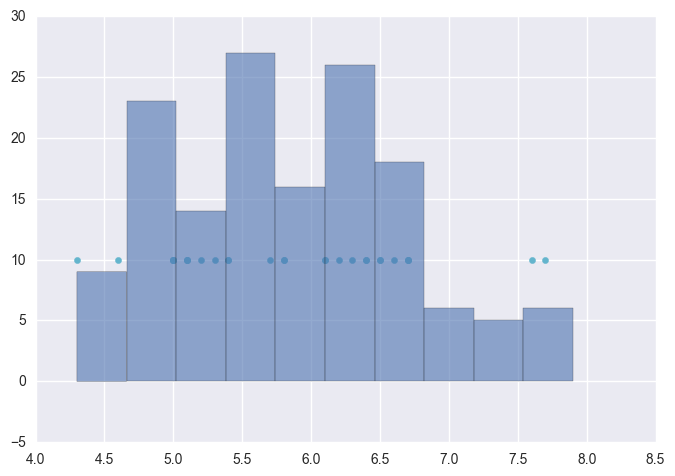

In [36]:
# is the sample representatif ?
plt.hist(x,alpha=0.6)
plt.scatter(samplex,len(samplex)*[10],color=colors[5])
# seems its like a representatif one :D

In [37]:
g2=np.poly1d(np.polyfit(samplex,samplef,5))

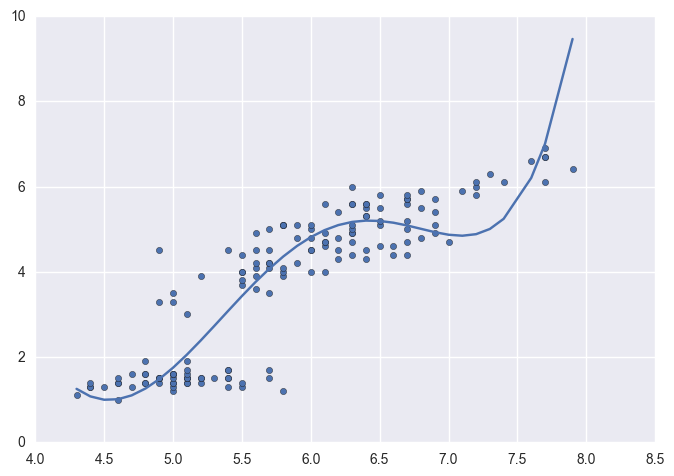

In [38]:
#  ploting the model on the whole data 
plt.scatter(x,f)
plt.plot(x,g2(x))

## Approximate a noisy sinus function

(158,)

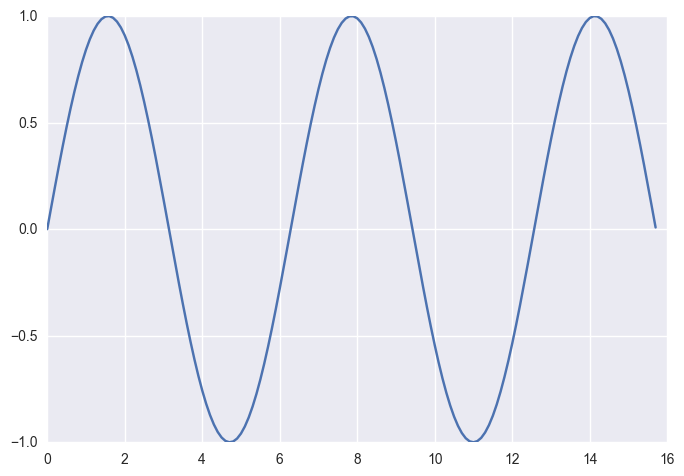

In [42]:
x=np.arange(0,5*np.pi,0.1) 
f=np.sin(x)
plt.plot(x,np.sin(x))
x.shape

In [43]:
index=np.sort(np.random.choice(x.shape[0],size=20,replace=False))
index

array([ 22,  30,  46,  49,  58,  65,  74,  89,  94,  96,  99, 102, 116,
       120, 122, 124, 131, 137, 139, 151])

In [44]:
xs=x[index]
fs=f[index]

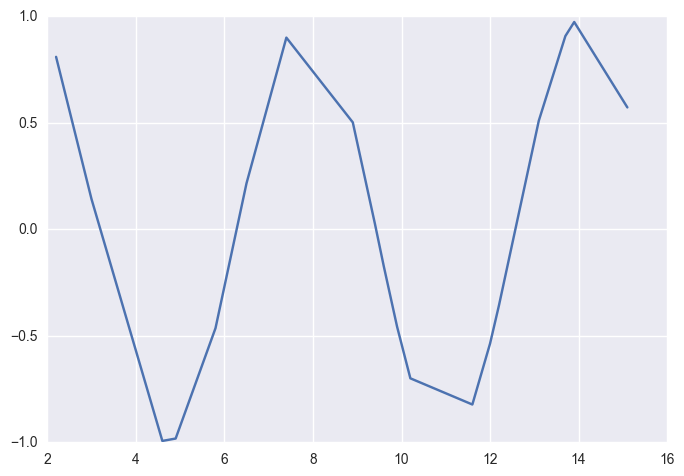

In [45]:
plt.plot(xs,fs)

In [46]:
def fitpoly(degree,xs,fs):
    g=np.poly1d(np.polyfit(xs,fs,degree))
    return g
g=[fitpoly(degree,xs,fs) for degree in range(20)]

/Users/mac/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/mac/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/mac/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/mac/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


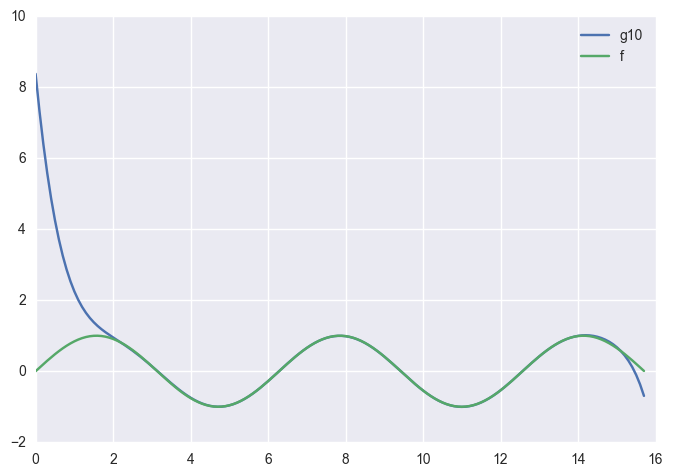

In [47]:
i=10
plt.plot(x,g[i](x),label='g'+str(i))    
plt.plot(x,f,label='f')
plt.legend()
    
    




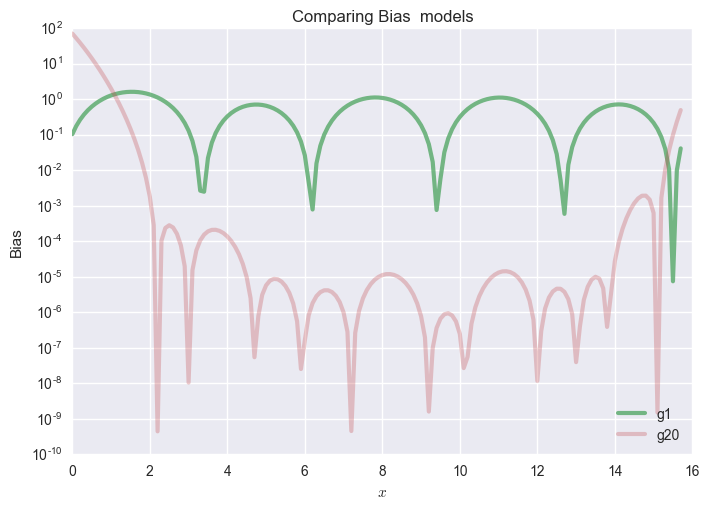

In [48]:
# lets find out the deterministic error or bias that comes from the model complexity
plt.title('Comparing Bias  models')
plt.plot(x,(f-g[1](x))**2,lw=3,label='g1',color=colors[1],alpha=0.8)
plt.plot(x,(f-g[10](x))**2,lw=3,label='g20',color=colors[2],alpha=0.3)
plt.yscale('log')
plt.xlabel('$x$')
plt.ylabel('Bias')
plt.legend(loc=4)



In [49]:
# adding the noise to the data 
import scipy as sp
nv=sp.stats.norm.rvs(size=158,scale=0.2)


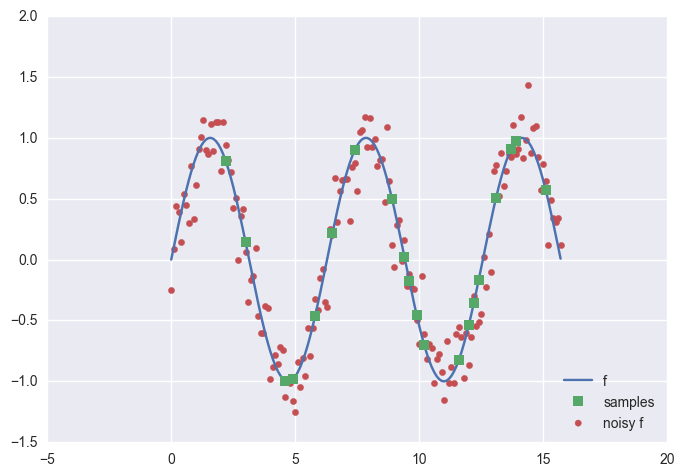

In [50]:
fn=f+nv
plt.plot(x,f,label='f')
plt.scatter(x,fn,color=colors[2],label='noisy f')
plt.plot(xs,fs,'s',label='samples')
plt.legend()
plt.legend(loc=4);

### fitting a noisy model

In [51]:
gnoisy=[fitpoly(degree,xs,fn[index]) for degree in range(20)]


/Users/mac/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/mac/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/mac/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/mac/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


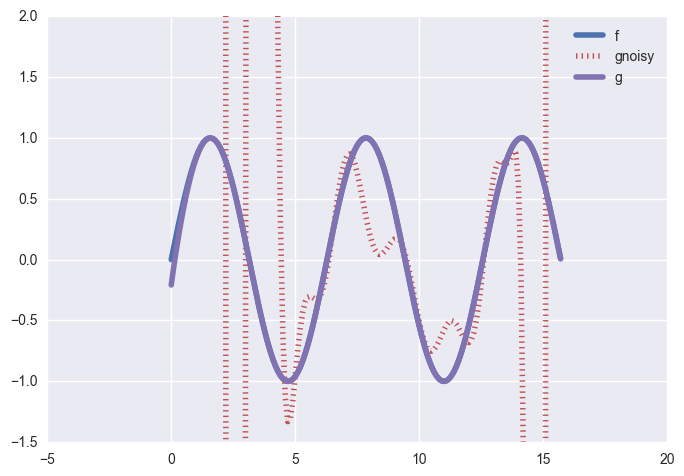

In [52]:
plt.plot(x,f,label='f',lw=4)
plt.plot(x,gnoisy[19](x),'b:',color=colors[2],label='gnoisy',lw=4)
plt.plot(x,g[19](x),color=colors[3],label='g',lw=4)
plt.xlim([-5,20])
plt.ylim([-1.5,2])
plt
plt.legend()

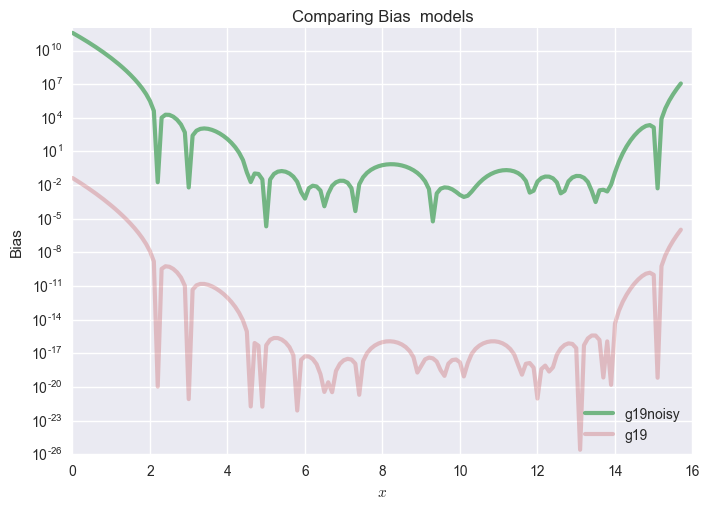

In [53]:
#comparing the bias between the noisy fit and non noisy 
plt.title('Comparing Bias  models')
plt.plot(x,(f-gnoisy[19](x))**2,lw=3,label='g19noisy',color=colors[1],alpha=0.8)
plt.plot(x,(f-g[19](x))**2,lw=3,label='g19',color=colors[2],alpha=0.3)
plt.yscale('log')
plt.xlabel('$x$')
plt.ylabel('Bias')
plt.legend(loc=4)

### Validate and test 


In [54]:
df=pd.DataFrame(dict(x=x[index],f=f[index],fn=fn[index]))
print df.shape
df.head()



(20, 3)


,f,fn,x
0,0.808496,0.943258,2.2
1,0.141120,0.062580,3.0
2,-0.993691,-1.130579,4.6
3,-0.982453,-1.163090,4.9
4,-0.464602,-0.322357,5.8


In [56]:
from sklearn.cross_validation import train_test_split
itrain,itest=train_test_split(range(20),train_size=15,test_size=5)# 
xtrain=df.x[itrain].values
fntrain=df.fn[itrain].values
ftrain=df.f[itrain].values
xtest=df.x[itest].values
fntest=df.fn[itest].values
ftest=df.f[itest].values


In [57]:
from sklearn.preprocessing import PolynomialFeatures
PolynomialFeatures(4).fit_transform([[1],[2]])

array([[  1.,   1.,   1.,   1.,   1.],
       [  1.,   2.,   4.,   8.,  16.]])

In [58]:
def make_features(degree,train,test):
    traintestlist=[]
    for d in degree:
        traintestdict={}
        traintestdict['train']=PolynomialFeatures(d).fit_transform(train.reshape(-1,1))
        traintestdict['test']=PolynomialFeatures(d).fit_transform(test.reshape(-1,1))
        traintestlist.append(traintestdict)
    return traintestlist


    

In [59]:
traintestlist=make_features(range(22),xtrain,xtest)
traintestlist[1]['test'],fntest
#degree 1 and test dataset

(array([[  1. ,  13.1],
        [  1. ,   4.6],
        [  1. ,   7.4],
        [  1. ,  13.7],
        [  1. ,  12.2]]),
 array([ 0.77381077, -1.13057877,  0.79385791,  0.84000587, -0.29555486]))

In [60]:
fntrain-ftrain

array([-0.35046322, -0.10291021,  0.07208357, -0.18063759, -0.0785401 ,
       -0.32867686,  0.14224557, -0.04206436,  0.13218478,  0.09277091,
        0.13476159,  0.05275829, -0.37874546,  0.27331133, -0.01434237])

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
degrees=range(21)
error_train=np.empty(len(degrees))
error_test=np.empty(len(degrees))
for d in range(21):
    est=LinearRegression()
    est.fit(traintestlist[d]['train'],fntrain)# train on noisy data
    error_train[d]=mean_squared_error(est.predict(traintestlist[d]['train']),ftrain) #test on data
    error_test[d]=mean_squared_error(est.predict(traintestlist[d]['test']),ftest)
    
        
        
    
       

        

(-100, 100)

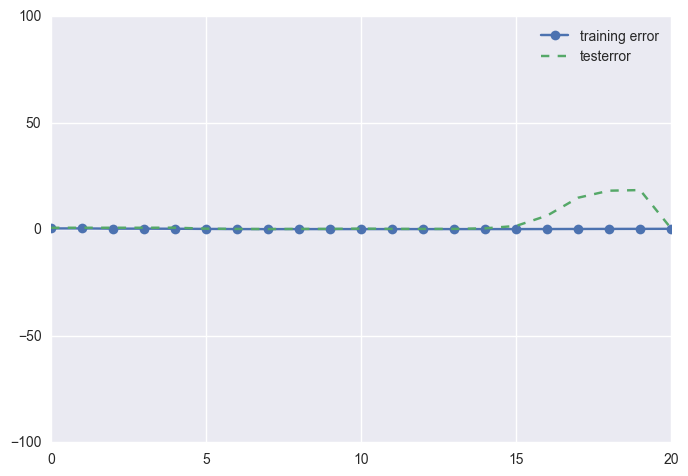

In [62]:
d=range(21)
plt.plot(d,error_train[d],'o-',label='training error')
plt.plot(d,error_test[d],'--',label='testerror')
plt.legend()
plt.ylim([-100,100])



In [63]:
itrain,ivalidate=train_test_split(itrain,train_size=7,test_size=3)# 

In [64]:
df.head()

,f,fn,x
0,0.808496,0.943258,2.2
1,0.141120,0.062580,3.0
2,-0.993691,-1.130579,4.6
3,-0.982453,-1.163090,4.9
4,-0.464602,-0.322357,5.8


NameError: name 'mind' is not defined

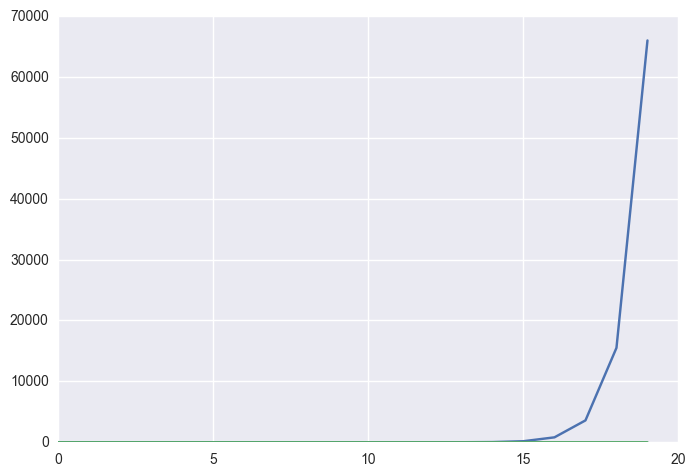

In [66]:
#training on noisy trainin set for d degree
xctrain=df.x[itrain].values
fntrain=df.fn[itrain].values
ftrain=df.f[itrain].values
# validate d degree
xcvalidate=df.x[ivalidate].values
fvalidate=df.f[ivalidate].values
#--------> give err for every d 
#test final
xctest=df.x[itest].values
fctest=df.f[itest].values

#training and validation sets in sklearn format
trainvalidate=make_features(range(20),xctrain,xcvalidate)
#error definition
validerr=np.empty(len(range(20)))
trainerr=np.empty(len(range(20)))


#training err and vali
for d in range(20):
    lm=LinearRegression()
    lm.fit(trainvalidate[d]['train'],fntrain)
    validerr[d]=mean_squared_error(fvalidate,lm.predict(trainvalidate[d]['test']))
    trainerr[d]=mean_squared_error(ftrain,lm.predict(trainvalidate[d]['train']))
    
dmin=np.argmin(validerr)
#traintestlist
# now that we have the right complexity d=dmin we r going to train on the whole training set and test
#xtest=df.x[itest].values fntest=df.fn[itest].values
lm=LinearRegression()
lm.fit(df.x[itrain].values.reshape(-1,1),df.fn[itrain].values.reshape(-1,1))
errtest=mean_squared_error(df.fn[itest].values.reshape(-1,1),lm.predict(df.x[itest].values.reshape(-1,1)))


d=range(20)
plt.plot(d,validerr[d],label='validationErr')
plt.plot(d,trainerr[d],label='trainErr')
plt.plot([mind],errtest,'s',label='testerr')
plt.ylim([-10,10])
plt.xlim([0,10])


plt.legend()



    
    
    
    

